### Feature Extraction


In diesem Notebook werden die Merkmale aus den Bilder extrahiert und in eine .csv-Datei geschrieben. Zusätzlich werden zur Verdeutlichung mehrere Bilder ausgegeben, auf denen die erhobenen Merkmale visulisiert sind


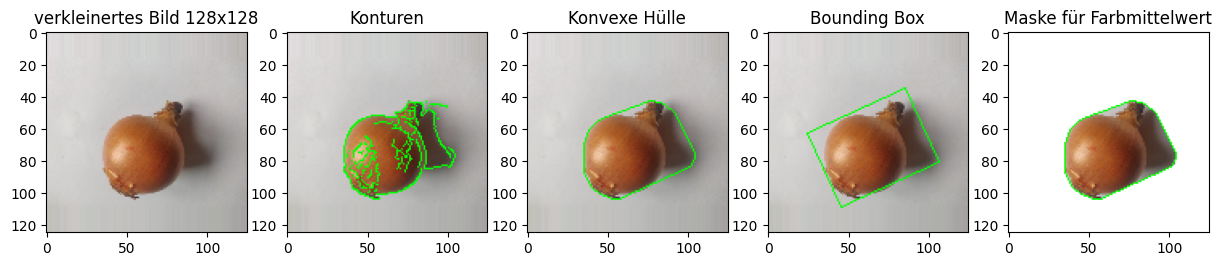

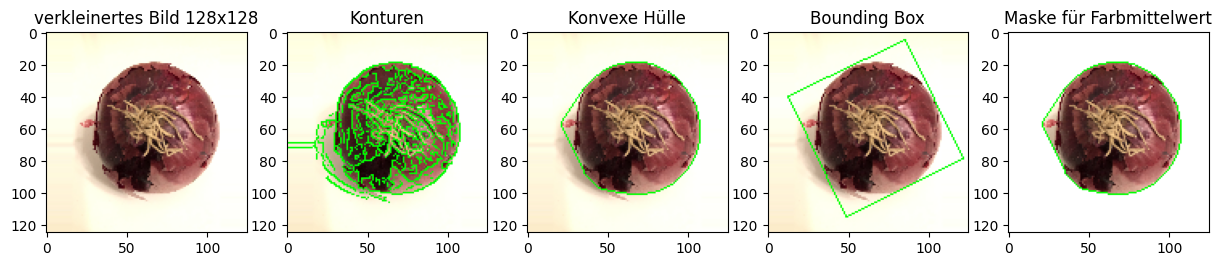

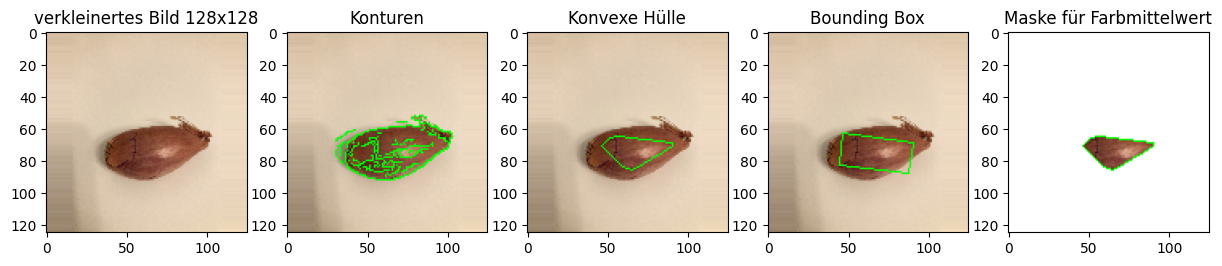

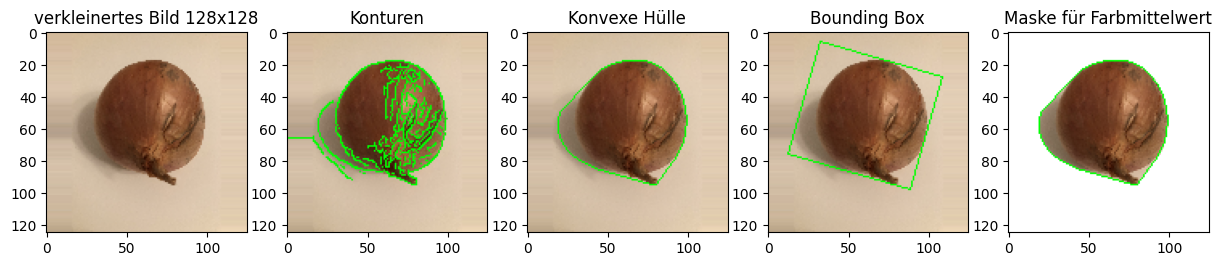

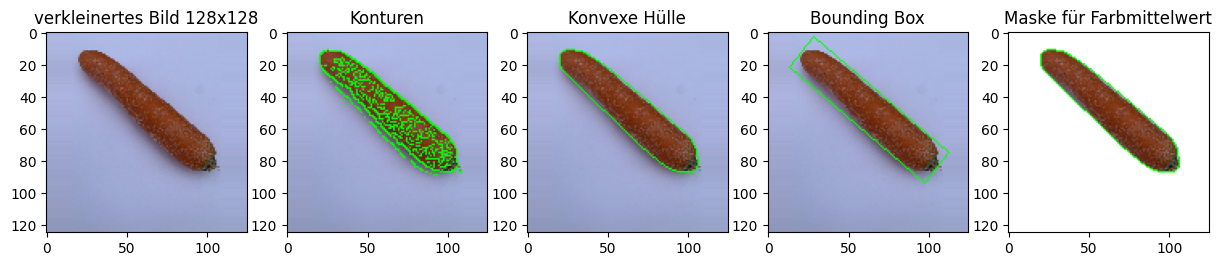

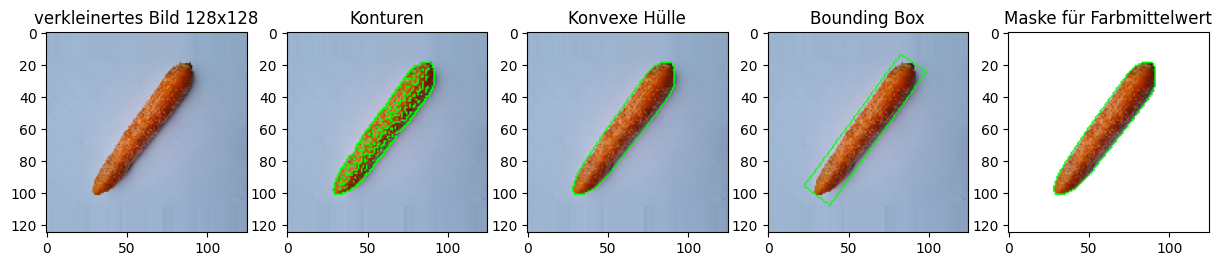

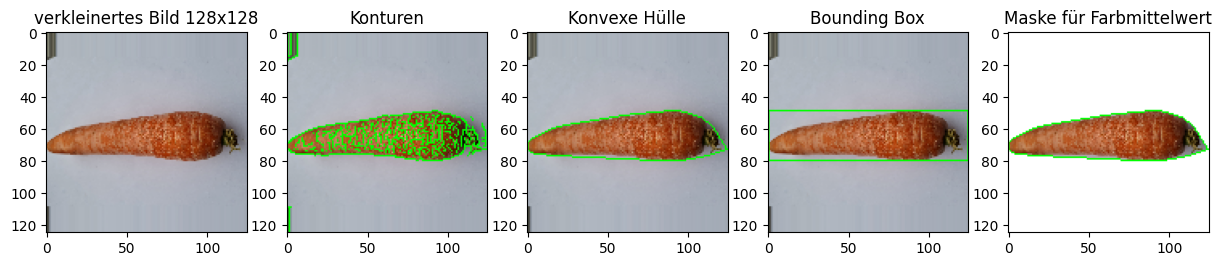

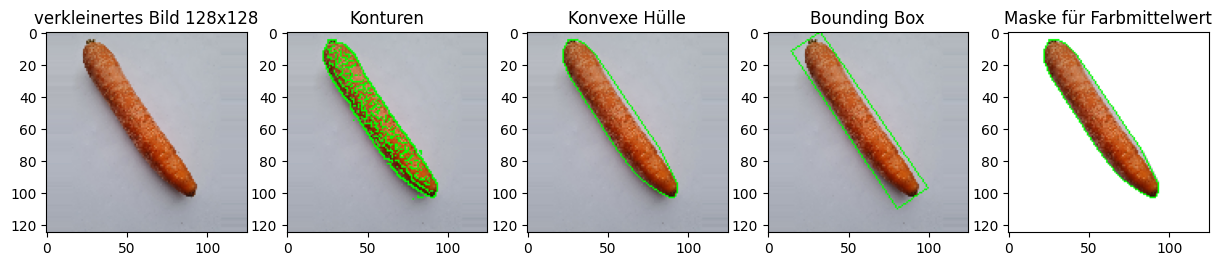

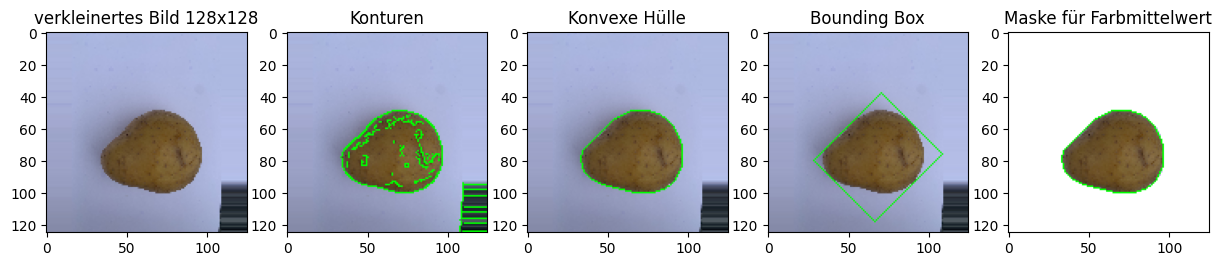

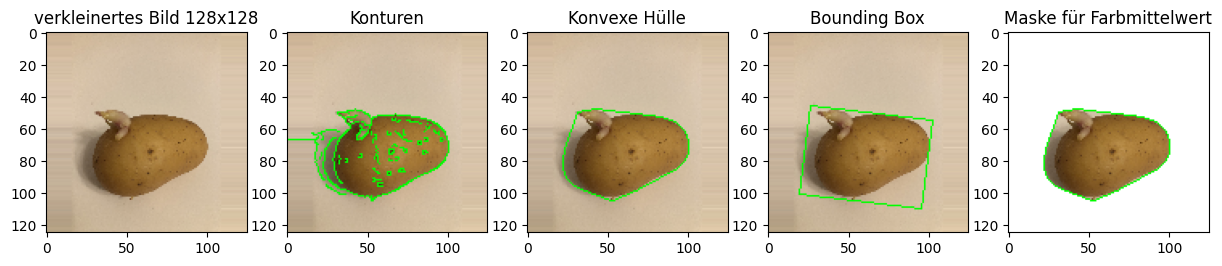

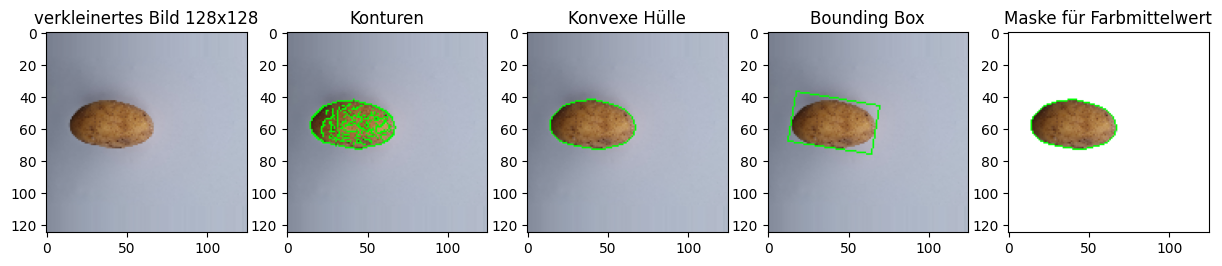

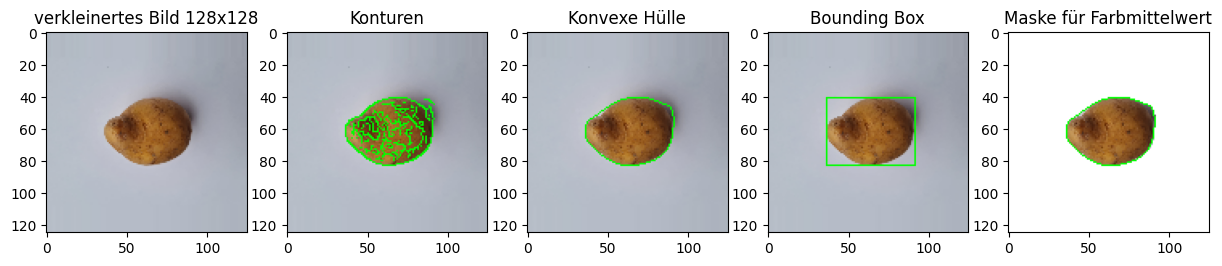

In [4]:
import cv2 as cv
import pandas as pd
import numpy as np
import os
import feature_extraction_functions
import matplotlib.pyplot as plt 

df_layout = {
    "contour number": [],
    "aspect ratio": [],
    "extent": [],
    "Blue": [],
    "Green": [],
    "Red": [],
    "Hue": [],
    "class": [],
}
df = pd.DataFrame(df_layout)  # Erstellt Dataframe layout
# gewünschte Auflösung (Breite, Höhe) des bildes für die Merkmalerkennung
new_width, new_height = (125, 125)
# zahl 600 ist die größte seite des Anzeigefensters
zoomfactor = int(600 / max(new_width, new_height))
# Berechnung des Zoomfaktors (nur für Anzeige)
zoom = (new_width * zoomfactor, new_height * zoomfactor)

images_per_row = 3

max_files_global =4
for i in range(3):  # for Schleife auf Bilder aus verschiedenen Ordnern zuzugreifen
    if i == 0:
        input_dir = "photos_examples/Zwiebel"
        output_dir = "photos_examples_reduced/Zwiebel_reduced"
        files = os.listdir(input_dir)  # speichert dateinamen in liste
        count = 1  # setzten
        max_files = max_files_global  # Anzahl bilder die gelesen werden sollen
    elif i == 1:
        input_dir = "photos_examples/Karotte"
        output_dir = "photos_examples_reduced/Karotte_reduced"
        files = os.listdir(input_dir)
        count = max_files_global+1  # zurücksetzten (nur Reihe fortsetzen wenn bilder angezeigt werden sollen, weil bilder sich sonst überschreiben. Sonst kann wieder bei 1 begoonen werden und immer gleiches "max_files" genutzt werden)
        max_files = max_files_global*2  # Anzahl bilder die gelesen werden sollen
    elif i == 2:
        input_dir = "photos_examples/Kartoffel"
        output_dir = "photos_examples_reduced/Kartoffel_reduced"
        files = os.listdir(input_dir)
        count = 2*max_files_global+1
        max_files = max_files_global*3

    for file in files:
        # Bild aus Ordner einlesen, verkleinern in Zielordner schreiben und zurück geben
        img = feature_extraction_functions.resize(
            input_dir, output_dir, file, new_width, new_height
        )

        (
            contour_number,
            aspect_ratio,
            extent,
            average_blue,
            average_green,
            average_red,
            average_hue,
            pil_img_contours,
            pil_img_hull,
            pil_img_bounding,
            pil_img_mask
        ) = feature_extraction_functions.get_Features(img, count, zoom)
        
        plt.figure(figsize=(15, 15))  # Anpassen der Größe des Anzeigefensters

        plt.subplot(1, 5, 1)
        plt.title("verkleinertes Bild 128x128")
        plt.imshow(img)
        plt.subplot(1, 5, 2)
        plt.title("Konturen")
        plt.imshow(pil_img_contours)
        plt.subplot(1, 5, 3)
        plt.title("Konvexe Hülle")
        plt.imshow(pil_img_hull)
        plt.subplot(1, 5, 4)
        plt.title("Bounding Box")
        plt.imshow(pil_img_bounding)
        plt.subplot(1, 5, 5)
        plt.title("Maske für Farbmittelwert")
        plt.imshow(pil_img_mask)

        plt.show()

        # werte an value im dictionary hängen
        df_layout["contour number"].append(contour_number)
        df_layout["aspect ratio"].append(aspect_ratio)
        df_layout["extent"].append(extent)
        df_layout["Blue"].append(average_blue)
        df_layout["Green"].append(average_green)
        df_layout["Red"].append(average_red)
        df_layout["Hue"].append(average_hue)
        df_layout["class"].append(i)

        if count >= max_files:
            break
        count += 1

df = pd.DataFrame(df_layout)
# csv speichert weniger Metadaten, braucht weniger Speicher, sehr sinnvoll wenn Daten isehr groß werden. "," als trennzeichen für ordentliche Formatierung der Anzeigetabelle
df.to_csv("output.csv", sep=",")

cv.waitKey(0)
cv.destroyAllWindows()